In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import sklearn
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

## Pretty variable display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## RANDOM STATE
seed=3

# Cluster data2 with EM Gaussian Mixture Models

Steps
- Determine number of clusters
- Run clustering
- Analyze clusters
- save df with cluster info for each player `em_player_clusters`

In [16]:
df = pd.read_csv('../data/pca2_99.csv', index_col=0)
df.head()
df.describe()

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_17,pc_18,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24,pc_25,pc_26
A.C. Green 96,4.506999,-3.072916,0.011961,0.322358,1.516012,0.048521,1.350044,-1.646836,-3.925026,-0.212186,...,0.815903,-0.201517,-0.108843,-0.615913,-1.049871,-0.263113,-1.375293,-0.189850,0.088085,-0.648803
Aaron McKie 96,-2.558255,-2.317561,-2.542660,1.822334,1.599799,2.114822,-1.929732,0.861607,-0.478111,-0.759294,...,-1.507366,-0.859214,-0.007578,0.190111,-0.383180,0.912449,-0.018548,0.197796,0.216994,0.350767
Adam Keefe 96,6.017820,-3.133306,-1.051175,1.476819,1.531184,3.092225,0.661053,1.680265,-0.533948,1.380635,...,1.183839,-0.608435,0.759162,0.306459,-0.037308,1.008378,-0.440403,-0.060685,-0.138398,-0.260890
Allan Houston 96,-4.166412,0.223718,1.268073,-2.255829,1.807305,-0.261908,0.726524,1.985593,0.859194,-2.837422,...,0.100054,0.646436,-0.678202,-0.352623,0.053871,-0.077399,-0.440569,0.027354,0.055659,-0.230672
Allen Iverson 96,-5.318884,5.999926,-2.388070,-0.574251,-1.680974,1.064761,0.063843,-1.933359,-0.773898,-2.345127,...,1.023196,0.715614,0.384617,0.174131,-0.071956,-0.109426,-0.064981,-0.497866,-0.333590,-0.057875


,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_17,pc_18,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24,pc_25,pc_26
count,7.246000e+03,7.246000e+03,7246.000000,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7246.000000,...,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03
mean,-3.137920e-17,-5.883600e-17,0.000000,-6.275840e-17,-1.255168e-16,2.353440e-17,-1.765080e-17,1.568960e-17,1.568960e-17,0.000000,...,-7.844800e-18,-1.568960e-17,5.883600e-18,-1.176720e-17,3.137920e-17,3.137920e-17,3.726280e-17,1.078660e-17,2.745680e-17,-1.667020e-17
std,4.662302e+00,3.722185e+00,2.364999,1.918954e+00,1.634146e+00,1.581359e+00,1.523897e+00,1.445552e+00,1.320852e+00,1.172057,...,6.904992e-01,6.829337e-01,6.583935e-01,6.464377e-01,5.825810e-01,5.402380e-01,5.070874e-01,4.907986e-01,3.418851e-01,3.090336e-01
min,-9.158911e+00,-1.086139e+01,-8.641853,-6.470085e+00,-5.533769e+00,-5.869113e+00,-5.567295e+00,-5.053038e+00,-5.286047e+00,-3.922585,...,-2.385378e+00,-2.908742e+00,-2.326177e+00,-2.181805e+00,-2.209489e+00,-2.068922e+00,-2.286361e+00,-1.788803e+00,-1.222444e+00,-1.060427e+00
25%,-3.876739e+00,-2.586800e+00,-1.583286,-1.293246e+00,-1.138773e+00,-1.068707e+00,-1.027148e+00,-9.871339e-01,-8.939324e-01,-0.840275,...,-4.694120e-01,-4.337295e-01,-4.407021e-01,-4.395429e-01,-3.827554e-01,-3.613617e-01,-3.198454e-01,-3.203130e-01,-2.266942e-01,-1.958283e-01
50%,-1.207936e+00,-2.860366e-01,-0.061169,-5.871154e-02,-3.682621e-02,4.152554e-03,2.402927e-02,2.169510e-02,-2.885825e-02,-0.057811,...,-9.507811e-03,1.770939e-03,-2.405571e-02,-6.820034e-03,1.056125e-02,-1.572344e-02,-3.566878e-02,3.488405e-03,-1.872256e-02,-1.921928e-02
75%,4.286928e+00,2.336857e+00,1.575436,1.251905e+00,1.112449e+00,1.051868e+00,1.036868e+00,9.614325e-01,8.867941e-01,0.757534,...,4.473054e-01,4.360655e-01,4.254411e-01,4.325715e-01,3.814906e-01,3.561138e-01,2.885524e-01,3.265764e-01,2.092324e-01,1.619544e-01
max,1.196055e+01,1.537008e+01,9.816677,7.012431e+00,5.673222e+00,7.123527e+00,6.296441e+00,7.064091e+00,5.735360e+00,5.402320,...,2.907006e+00,2.969850e+00,2.970180e+00,2.448157e+00,2.283219e+00,2.151622e+00,2.392230e+00,2.542435e+00,1.873599e+00,1.785778e+00


## EM GMM

### Determine number of clusters via GMM likelihood

C:\Users\alexk\anaconda3\envs\nba\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


Wall time: 3min 15s


Text(0.5, 0, 'Number components')

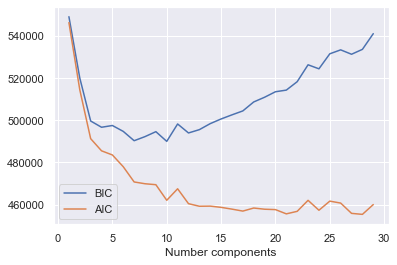

In [18]:
%%time
range_n_components = np.arange(1,30)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=seed).fit(df) for n in range_n_components]

plt.plot(range_n_components, [model.bic(df) for model in models], label='BIC')
plt.plot(range_n_components, [model.aic(df) for model in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number components');

In [19]:
GMM = GaussianMixture(n_components=15)
soft_labels = GMM.fit(df).predict_proba(df)
hard_labels = GMM.predict(df)

### Create df with cluster ids and player index

In [36]:
df_cluster = pd.DataFrame(hard_labels, index=df.index, columns=['hard_label'])
soft_cols = ['cluster_' + str(n) for n in range(15)]
df_cluster[soft_cols] = soft_labels
df_cluster.shape
df_cluster.head()

(7246, 16)

,hard_label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
A.C. Green 96,1,1.058418e-78,9.987171e-01,7.440421e-257,2.055192e-176,0.00000,2.316831e-236,0.00000,6.673798e-15,1.282932e-03,0.000000e+00,8.132571e-48,1.158861e-25,4.964794e-63,2.034180e-260,2.517565e-255
Aaron McKie 96,0,9.999657e-01,4.087872e-130,3.422513e-05,5.087880e-12,0.00000,2.666942e-14,0.00000,3.135888e-11,9.098760e-162,0.000000e+00,4.486022e-20,7.284244e-08,3.016408e-43,3.941359e-19,5.742906e-10
Adam Keefe 96,4,3.002205e-134,3.831297e-08,0.000000e+00,3.211427e-322,0.99794,0.000000e+00,0.00206,3.048204e-54,6.397154e-16,2.830302e-27,2.061240e-119,1.900024e-35,1.568612e-102,0.000000e+00,0.000000e+00
Allan Houston 96,0,9.975394e-01,8.294634e-251,2.460566e-03,1.695611e-20,0.00000,2.942900e-14,0.00000,1.054170e-21,1.757596e-284,0.000000e+00,3.967573e-24,3.632665e-23,1.143880e-15,6.064057e-22,1.022987e-09
Allen Iverson 96,0,9.999999e-01,1.253299e-134,1.478602e-08,9.005246e-53,0.00000,4.372697e-37,0.00000,5.409987e-17,3.872593e-153,0.000000e+00,1.957781e-17,2.483284e-12,7.388976e-08,6.039053e-59,1.332456e-25


In [39]:
df_cluster.to_csv('../data/data_gmm_15_clusters.csv')

### Investigate cluster trends

In [42]:
df_cluster['hard_label'].value_counts()

4     1339
13     970
0      922
3      754
5      546
14     533
6      408
9      408
11     289
12     208
2      200
7      193
10     184
8      169
1      123
Name: hard_label, dtype: int64

In [51]:
n=10
df_cluster[df_cluster['hard_label']==n][::10]

,hard_label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
Antoine Walker 96,10,1.708941e-01,1.105806e-16,2.368951e-22,3.748005e-35,0.0,6.847803e-37,0.0,4.196604e-08,4.041636e-14,0.0,0.829098,1.723408e-14,8.318370e-06,2.919743e-51,5.232130e-36
Arvydas Sabonis 97,10,5.031366e-04,1.158304e-20,1.976017e-34,3.542719e-71,0.0,7.632452e-63,0.0,1.285465e-08,7.339073e-06,0.0,0.999490,2.234069e-19,1.584593e-21,4.592690e-97,3.689033e-61
Cedric Ceballos 99,10,2.475428e-13,1.082180e-32,5.524659e-21,1.257922e-36,0.0,8.151137e-30,0.0,1.369049e-05,2.080120e-14,0.0,0.999985,1.872811e-18,9.675579e-07,2.022142e-52,8.181064e-45
Paul Pierce 99,10,9.063789e-25,4.235622e-84,8.660994e-03,2.873940e-43,0.0,8.276025e-26,0.0,2.105214e-09,4.402874e-68,0.0,0.991339,3.250291e-10,2.214595e-07,2.842827e-48,1.004214e-26
Greg Buckner 01,10,1.332504e-15,1.022644e-04,5.015762e-63,3.244712e-30,0.0,7.166890e-51,0.0,2.486920e-02,1.061813e-06,0.0,0.975027,8.882882e-13,1.259754e-21,2.954122e-68,4.785908e-57
Andrei Kirilenko 04,10,2.390952e-06,9.475669e-30,3.160292e-27,1.032040e-59,0.0,3.325493e-51,0.0,1.200176e-10,4.143351e-23,0.0,0.999998,1.494273e-17,6.142760e-21,2.907850e-80,2.311169e-43
Brad Miller 05,10,0.000000e+00,2.276109e-09,1.625111e-39,2.720952e-09,0.0,9.211839e-26,0.0,3.417525e-05,8.107911e-06,0.0,0.999957,6.928036e-09,1.195114e-06,6.628781e-37,2.909064e-47
Gerald Wallace 07,10,0.000000e+00,2.276836e-63,4.954722e-31,2.134940e-01,0.0,9.949771e-02,0.0,2.391564e-11,6.002987e-59,0.0,0.687004,2.121424e-06,8.247251e-10,1.925302e-06,1.538237e-22
Lamar Odom 08,10,0.000000e+00,9.377929e-12,4.555747e-29,2.712052e-02,0.0,1.747864e-15,0.0,1.128693e-04,5.704132e-13,0.0,0.972767,7.874878e-11,5.584599e-11,1.309451e-19,1.170427e-23
Gerald Wallace 10,10,0.000000e+00,8.056100e-45,4.134107e-20,3.910584e-01,0.0,7.061995e-06,0.0,3.234939e-07,3.365562e-44,0.0,0.608907,1.333763e-09,2.699560e-05,3.839550e-07,4.564850e-18


In [49]:
## with 15 clusters
df_em = df_cluster.copy()

player = 'LeBron'
df_em[df_em.index.str.contains(player)]['hard_label']

player = 'Kobe'
df_em[df_em.index.str.contains(player)]['hard_label']

player = 'Gary Payton'
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Shaquille O'Neal"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Dwight Howard"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Eddie House"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Dirk"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "James Harden"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "JJ Redick"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Kevin Durant"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Klay Thompson"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Yao Ming"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Paul Pierce"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Kevin Garnett"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Pau Gasol"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Derrick Rose"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Steve Nash"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Deron Williams"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Jason Kidd"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Paul George"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Russell Westbrook"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Lou Williams"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Jamal Crawford"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Allen Iverson"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Carmelo Anthony"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Ben Wallace"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Danny Granger"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Roy Hibbert"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Lance Stephenson"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Richard Hamilton"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Marcus Camby"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Tim Duncan"
df_em[df_em.index.str.contains(player)]['hard_label']

LeBron James 03     0
LeBron James 04    12
LeBron James 05    12
LeBron James 06    12
LeBron James 07    12
LeBron James 08    12
LeBron James 09    12
LeBron James 10    12
LeBron James 11    12
LeBron James 12    12
LeBron James 13    12
LeBron James 14    12
LeBron James 15    12
LeBron James 16    12
LeBron James 17    12
LeBron James 18    12
LeBron James 19    12
Name: hard_label, dtype: int64

Kobe Bryant 96     0
Kobe Bryant 97     0
Kobe Bryant 98    12
Kobe Bryant 99    12
Kobe Bryant 00    12
Kobe Bryant 01    12
Kobe Bryant 02    12
Kobe Bryant 03     0
Kobe Bryant 04     0
Kobe Bryant 05    12
Kobe Bryant 06    12
Kobe Bryant 07     5
Kobe Bryant 08    12
Kobe Bryant 09    12
Kobe Bryant 10    12
Kobe Bryant 11    12
Kobe Bryant 12    12
Kobe Bryant 14     5
Kobe Bryant 15     5
Name: hard_label, dtype: int64

Gary Payton 96     0
Gary Payton 97     0
Gary Payton 98     0
Gary Payton 99    12
Gary Payton 00     0
Gary Payton 01     0
Gary Payton 02     0
Gary Payton 03     0
Gary Payton 04     0
Gary Payton 05     3
Gary Payton 06    13
Name: hard_label, dtype: int64

Shaquille O'Neal 96    8
Shaquille O'Neal 97    8
Shaquille O'Neal 98    8
Shaquille O'Neal 99    8
Shaquille O'Neal 00    8
Shaquille O'Neal 01    8
Shaquille O'Neal 02    8
Shaquille O'Neal 03    8
Shaquille O'Neal 04    8
Shaquille O'Neal 05    8
Shaquille O'Neal 06    8
Shaquille O'Neal 07    4
Shaquille O'Neal 08    9
Shaquille O'Neal 09    4
Shaquille O'Neal 10    4
Name: hard_label, dtype: int64

Dwight Howard 04    4
Dwight Howard 05    4
Dwight Howard 06    4
Dwight Howard 07    4
Dwight Howard 08    9
Dwight Howard 09    9
Dwight Howard 10    9
Dwight Howard 11    9
Dwight Howard 12    9
Dwight Howard 13    9
Dwight Howard 14    9
Dwight Howard 15    4
Dwight Howard 16    4
Dwight Howard 17    9
Dwight Howard 19    9
Name: hard_label, dtype: int64

Eddie House 01     0
Eddie House 02     0
Eddie House 03     0
Eddie House 04     0
Eddie House 05    13
Eddie House 06    14
Eddie House 07    13
Eddie House 08    14
Eddie House 09    13
Eddie House 10    13
Name: hard_label, dtype: int64

Dirk Nowitzki 98     0
Dirk Nowitzki 99    12
Dirk Nowitzki 00     0
Dirk Nowitzki 01    12
Dirk Nowitzki 02    12
Dirk Nowitzki 03    12
Dirk Nowitzki 04    12
Dirk Nowitzki 05    12
Dirk Nowitzki 06    12
Dirk Nowitzki 07    12
Dirk Nowitzki 08    12
Dirk Nowitzki 09    12
Dirk Nowitzki 10    12
Dirk Nowitzki 11    12
Dirk Nowitzki 12    12
Dirk Nowitzki 13    12
Dirk Nowitzki 14     3
Dirk Nowitzki 15     3
Dirk Nowitzki 16     3
Dirk Nowitzki 17     3
Dirk Nowitzki 18    14
Name: hard_label, dtype: int64

James Harden 09    13
James Harden 10     5
James Harden 11     5
James Harden 12     5
James Harden 13     5
James Harden 14     5
James Harden 15     5
James Harden 16     5
James Harden 17     5
James Harden 18     5
James Harden 19     5
Name: hard_label, dtype: int64

JJ Redick 08    13
JJ Redick 09    13
JJ Redick 10    13
JJ Redick 11    13
JJ Redick 12    13
JJ Redick 13    14
JJ Redick 14    13
JJ Redick 15    13
JJ Redick 16    13
JJ Redick 17    13
JJ Redick 18    13
JJ Redick 19    13
Name: hard_label, dtype: int64

Kevin Durant 07     5
Kevin Durant 08    10
Kevin Durant 09    12
Kevin Durant 10    12
Kevin Durant 11    12
Kevin Durant 12    12
Kevin Durant 13    12
Kevin Durant 14    12
Kevin Durant 15    12
Kevin Durant 16    12
Kevin Durant 17    12
Kevin Durant 18    12
Name: hard_label, dtype: int64

Klay Thompson 11    13
Klay Thompson 12    13
Klay Thompson 13    13
Klay Thompson 14     5
Klay Thompson 15    13
Klay Thompson 16    13
Klay Thompson 17    13
Klay Thompson 18    13
Name: hard_label, dtype: int64

Yao Ming 02    4
Yao Ming 03    4
Yao Ming 04    4
Yao Ming 05    4
Yao Ming 06    4
Yao Ming 07    4
Yao Ming 08    4
Name: hard_label, dtype: int64

Paul Pierce 98     0
Paul Pierce 99    10
Paul Pierce 00     0
Paul Pierce 01     0
Paul Pierce 02    12
Paul Pierce 03     0
Paul Pierce 04     0
Paul Pierce 05     5
Paul Pierce 06     5
Paul Pierce 07     5
Paul Pierce 08     5
Paul Pierce 09     5
Paul Pierce 10     5
Paul Pierce 11     5
Paul Pierce 12     5
Paul Pierce 13     5
Paul Pierce 14     3
Paul Pierce 15    13
Name: hard_label, dtype: int64

Kevin Garnett 96     6
Kevin Garnett 97     6
Kevin Garnett 98     6
Kevin Garnett 99    10
Kevin Garnett 00     8
Kevin Garnett 01     8
Kevin Garnett 02     8
Kevin Garnett 03     8
Kevin Garnett 04     8
Kevin Garnett 05     8
Kevin Garnett 06     8
Kevin Garnett 07     9
Kevin Garnett 08     9
Kevin Garnett 09     8
Kevin Garnett 10     8
Kevin Garnett 11     8
Kevin Garnett 12     9
Kevin Garnett 13     4
Kevin Garnett 14     9
Name: hard_label, dtype: int64

Pau Gasol 01     6
Pau Gasol 02     6
Pau Gasol 03     6
Pau Gasol 04     6
Pau Gasol 05     9
Pau Gasol 06     9
Pau Gasol 07     9
Pau Gasol 08     4
Pau Gasol 09     4
Pau Gasol 10     9
Pau Gasol 11     8
Pau Gasol 12     9
Pau Gasol 13     8
Pau Gasol 14     9
Pau Gasol 15    10
Pau Gasol 16    10
Pau Gasol 17     3
Name: hard_label, dtype: int64

Derrick Rose 08    11
Derrick Rose 09    11
Derrick Rose 10     5
Derrick Rose 11     5
Derrick Rose 14     5
Derrick Rose 15    11
Derrick Rose 16    11
Derrick Rose 18     5
Derrick Rose 19     5
Name: hard_label, dtype: int64

Steve Nash 97    0
Steve Nash 98    0
Steve Nash 99    2
Steve Nash 00    0
Steve Nash 01    0
Steve Nash 02    0
Steve Nash 03    0
Steve Nash 04    0
Steve Nash 05    5
Steve Nash 06    5
Steve Nash 07    5
Steve Nash 08    5
Steve Nash 09    5
Steve Nash 10    5
Steve Nash 11    5
Steve Nash 12    5
Name: hard_label, dtype: int64

Deron Williams 05    13
Deron Williams 06     5
Deron Williams 07     5
Deron Williams 08     5
Deron Williams 09    12
Deron Williams 10     5
Deron Williams 11     5
Deron Williams 12     5
Deron Williams 13     5
Deron Williams 14     5
Deron Williams 15     5
Deron Williams 16     5
Name: hard_label, dtype: int64

Jason Kidd 96     0
Jason Kidd 97     2
Jason Kidd 98     0
Jason Kidd 99     2
Jason Kidd 00     0
Jason Kidd 01     2
Jason Kidd 02     2
Jason Kidd 03     2
Jason Kidd 04     2
Jason Kidd 05     2
Jason Kidd 06     2
Jason Kidd 07     2
Jason Kidd 08     2
Jason Kidd 09     2
Jason Kidd 10     2
Jason Kidd 11    14
Jason Kidd 12    14
Name: hard_label, dtype: int64

Paul George 10     3
Paul George 11    13
Paul George 12     5
Paul George 13     5
Paul George 15     5
Paul George 16     5
Paul George 17     5
Paul George 18     5
Paul George 19     5
Name: hard_label, dtype: int64

Russell Westbrook 08    12
Russell Westbrook 09    12
Russell Westbrook 10    12
Russell Westbrook 11    12
Russell Westbrook 12    12
Russell Westbrook 13    12
Russell Westbrook 14    12
Russell Westbrook 15    12
Russell Westbrook 16    12
Russell Westbrook 17    12
Russell Westbrook 18    12
Russell Westbrook 19    12
Name: hard_label, dtype: int64

Lou Williams 07     5
Lou Williams 08     5
Lou Williams 09    13
Lou Williams 10     5
Lou Williams 11     5
Lou Williams 12     5
Lou Williams 13    13
Lou Williams 14     5
Lou Williams 15     5
Lou Williams 16     5
Lou Williams 17     5
Lou Williams 18     5
Lou Williams 19     5
Name: hard_label, dtype: int64

Jamal Crawford 00    14
Jamal Crawford 01    14
Jamal Crawford 02     0
Jamal Crawford 03     0
Jamal Crawford 04     0
Jamal Crawford 05     5
Jamal Crawford 06     5
Jamal Crawford 07     5
Jamal Crawford 08     5
Jamal Crawford 09     5
Jamal Crawford 10     5
Jamal Crawford 11     5
Jamal Crawford 12     5
Jamal Crawford 13     5
Jamal Crawford 14     5
Jamal Crawford 15     5
Jamal Crawford 16     5
Jamal Crawford 17     5
Jamal Crawford 18     5
Name: hard_label, dtype: int64

Allen Iverson 96     0
Allen Iverson 97     0
Allen Iverson 98    12
Allen Iverson 99    12
Allen Iverson 00    12
Allen Iverson 01    12
Allen Iverson 02    12
Allen Iverson 03    12
Allen Iverson 04    12
Allen Iverson 05    12
Allen Iverson 06    12
Allen Iverson 07    12
Allen Iverson 08    12
Allen Iverson 09    11
Name: hard_label, dtype: int64

Carmelo Anthony 03     0
Carmelo Anthony 04     0
Carmelo Anthony 05    12
Carmelo Anthony 06    12
Carmelo Anthony 07    12
Carmelo Anthony 08    12
Carmelo Anthony 09    12
Carmelo Anthony 10    12
Carmelo Anthony 11    12
Carmelo Anthony 12    12
Carmelo Anthony 13    12
Carmelo Anthony 14    12
Carmelo Anthony 15    12
Carmelo Anthony 16     5
Carmelo Anthony 17     3
Carmelo Anthony 19     3
Name: hard_label, dtype: int64

Ben Wallace 97    4
Ben Wallace 98    4
Ben Wallace 99    4
Ben Wallace 00    1
Ben Wallace 01    4
Ben Wallace 02    1
Ben Wallace 03    1
Ben Wallace 04    1
Ben Wallace 05    4
Ben Wallace 06    1
Ben Wallace 07    1
Ben Wallace 08    4
Ben Wallace 09    4
Ben Wallace 10    1
Ben Wallace 11    1
Name: hard_label, dtype: int64

Danny Granger 05     7
Danny Granger 06     3
Danny Granger 07     3
Danny Granger 08     3
Danny Granger 09     5
Danny Granger 10     5
Danny Granger 11     3
Danny Granger 13    14
Danny Granger 14    14
Name: hard_label, dtype: int64

Roy Hibbert 08    4
Roy Hibbert 09    9
Roy Hibbert 10    4
Roy Hibbert 11    4
Roy Hibbert 12    9
Roy Hibbert 13    9
Roy Hibbert 14    4
Roy Hibbert 15    4
Name: hard_label, dtype: int64

Lance Stephenson 12     3
Lance Stephenson 13     3
Lance Stephenson 14    11
Lance Stephenson 15     3
Lance Stephenson 17    13
Lance Stephenson 18    13
Name: hard_label, dtype: int64

Richard Hamilton 99     7
Richard Hamilton 00     0
Richard Hamilton 01     6
Richard Hamilton 02    12
Richard Hamilton 03    12
Richard Hamilton 04     7
Richard Hamilton 05     7
Richard Hamilton 06    12
Richard Hamilton 07     7
Richard Hamilton 08    12
Richard Hamilton 09    12
Richard Hamilton 10     3
Richard Hamilton 11     7
Richard Hamilton 12     7
Name: hard_label, dtype: int64

Marcus Camby 96    6
Marcus Camby 97    4
Marcus Camby 98    4
Marcus Camby 99    6
Marcus Camby 00    1
Marcus Camby 01    4
Marcus Camby 02    1
Marcus Camby 03    4
Marcus Camby 04    4
Marcus Camby 05    9
Marcus Camby 06    4
Marcus Camby 07    9
Marcus Camby 08    9
Marcus Camby 09    9
Marcus Camby 10    4
Marcus Camby 11    1
Name: hard_label, dtype: int64

Tim Duncan 97    6
Tim Duncan 98    6
Tim Duncan 99    6
Tim Duncan 00    8
Tim Duncan 01    6
Tim Duncan 02    8
Tim Duncan 03    8
Tim Duncan 04    6
Tim Duncan 05    8
Tim Duncan 06    8
Tim Duncan 07    4
Tim Duncan 08    4
Tim Duncan 09    9
Tim Duncan 10    4
Tim Duncan 11    9
Tim Duncan 12    9
Tim Duncan 13    4
Tim Duncan 14    9
Tim Duncan 15    4
Name: hard_label, dtype: int64